In [2]:
from functions import constructQP,EqualityQPSolver,constructQP,construct_matrix,sensitivity
import numpy as np 
import matplotlib.pyplot as plt 
from time import perf_counter 

KeyboardInterrupt: 

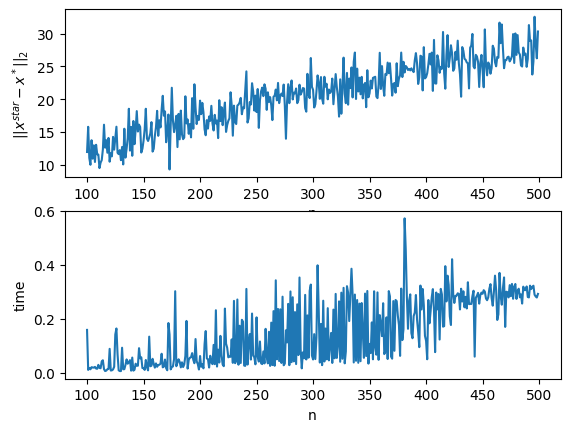

In [3]:
n           = np.arange(start=100,stop=500, dtype=int)
alpha       = 2
solvers     = ["LUdense","LDLdense","Nullspace","Rangespace","LUsparse"]

fig, (ax1,ax2) = plt.subplots(2, 1) 

for solver in solvers:
    
    err_temp    = []
    times       = []

    # Computing solution from all solvers
    for i in n:

        # Current problem given current n
        H, g, A, b, x_star,lamb_star,lenrhs = constructQP(i,alpha) 

        # timing the solver
        start = perf_counter()
        x,lam = EqualityQPSolver(H,g,A,b,solver)

        # time of solver
        times.append(perf_counter()-start)
        
        # 2 norm of error
        err_temp.append(np.linalg.norm(x-x_star,2))

    ax1.plot(n,err_temp,label=f"{solver} solver as a function of n")
    ax1.set_xlabel("n")
    ax1.set_ylabel(r"$||x^{star}-x^*||_2$")
    ax2.plot(n,times,label=f"{solver} solver as a function of n")
    ax2.set_xlabel("n")
    ax2.set_ylabel("time")

plt.legend()
plt.show()


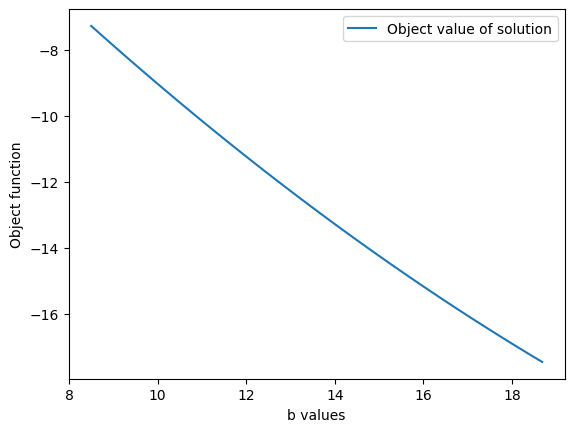

In [9]:
def object_solution(x):

    return 1/2*x.T@H@x+g.T@x

H = np.array([
    [5.0000, 1.8600, 1.2400, 1.4800, -0.4600],
    [1.8600, 3.0000, 0.4400, 1.1200, 0.5200],
    [1.2400, 0.4400, 3.8000, 1.5600, -0.5400],
    [1.4800, 1.1200, 1.5600, 7.2000, -1.1200],
    [-0.4600, 0.5200, -0.5400, -1.1200, 7.8000]
])
A = np.array([
    [16.1000, 1.0000],
    [8.5000, 1.0000],
    [15.7000, 1.0000],
    [10.0200, 1.0000],
    [18.6800, 1.0000]
])
g = np.array([
    -16.1000,
    -8.5000,
    -15.7000,
    -10.0200,
    -18.6800])

def b_vec(val):
    b = np.array([val,1])
    return b

b_values = np.linspace(8.5,18.68,100)

n,m = A.shape
obj_sol = np.zeros(len(b_values))

fig, (ax1) = plt.subplots(1, 1) 
for i,val in enumerate(b_values):
    
    x,lam = EqualityQPSolver(H,g,A,b_vec(val),"LUdense")
    obj_sol[i] = object_solution(x)

ax1.plot(b_values,obj_sol,label = "Object value of solution")
ax1.set_xlabel("b values")
ax1.set_ylabel("Object value of solution")

plt.legend()
plt.show()